In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import tensorflow as tf

print(tf.__version__)

2.9.2


In [4]:
#1. Data import and Understanding
#A. Read the ‘Signals.csv’ as DataFrame and import required libraries
import pandas as pd
import numpy as np
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical


data = pd.read_csv("/content/gdrive/MyDrive/AIML/LABS/intro to NN/NN Project Data - Signal.csv")

In [5]:
data

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#B. Check for missing values and print percentage for each attribute.
data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [8]:
data.isnull().value_counts()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  Parameter 11  Signal_Strength
False        False        False        False        False        False        False        False        False        False         False         False              1599
dtype: int64

In [9]:
percent = data.isnull().sum()*100/len(data)
percent

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [10]:
#C. Check for presence of duplicate records in the dataset and impute with appropriate method
dup = data.duplicated()
sum(dup)

240

In [11]:
data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
corr=data.corr()

In [13]:
corr

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [14]:
X=data.drop('Signal_Strength',axis=1) 
Y=data['Signal_Strength']                   


[0.07700415 0.09810308 0.08056669 0.07898856 0.07826573 0.07391622
 0.10291238 0.08477924 0.07625474 0.10342845 0.14578077]


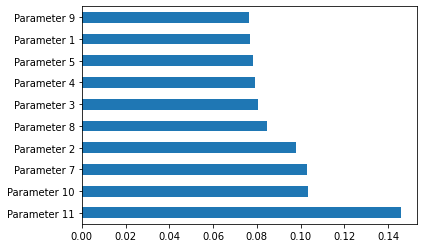

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

#feature importances of tree were used for inbuilt
print(model.feature_importances_) 

# Showing the highest range
FI= pd.Series(model.feature_importances_, index=X.columns)
FI.nlargest(10).plot(kind='barh')
plt.show()


In [50]:
# parameter 11 has the highest range of 0.14578077

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


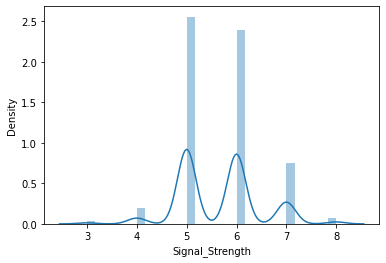

In [17]:
import seaborn as sns
sns.distplot(data['Signal_Strength'])

In [18]:
# 1) The observation of distribution plot clearly shows that most of the paramters have 5 signal strength.
# 2) Second most of the parameters have 6 signal strength.
# 3) Very few parameters have 4, 7 and 8 signal strength.

In [19]:
X=data.drop('Signal_Strength',axis=1)
y=data['Signal_Strength']               

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7,random_state=12)

In [20]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train) 
X_test = StandardScaler().fit_transform(X_test)   

In [21]:
# changing into categorical variable by one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119, 9)
(480, 9)


In [23]:
from tensorflow.keras.layers import LeakyReLU
model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(64, kernel_initializer='normal',activation='relu'))  
model.add(Dense(32, kernel_initializer='normal'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(16, kernel_initializer='normal'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(9, kernel_initializer='normal',activation='softmax')) 

In [24]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 9)                 1

In [26]:
Epoch = 200
classifier = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = Epoch, batch_size=700)

Epoch 1/200
2/2 [==============================] - 2s 428ms/step - loss: 0.1975 - accuracy: 0.2449 - val_loss: 0.1975 - val_accuracy: 0.5021
Epoch 2/200
2/2 [==============================] - 0s 43ms/step - loss: 0.1974 - accuracy: 0.4736 - val_loss: 0.1974 - val_accuracy: 0.4938
Epoch 3/200
2/2 [==============================] - 0s 48ms/step - loss: 0.1974 - accuracy: 0.4620 - val_loss: 0.1973 - val_accuracy: 0.4729
Epoch 4/200
2/2 [==============================] - 0s 67ms/step - loss: 0.1973 - accuracy: 0.4424 - val_loss: 0.1972 - val_accuracy: 0.4500
Epoch 5/200
2/2 [==============================] - 0s 42ms/step - loss: 0.1972 - accuracy: 0.4298 - val_loss: 0.1971 - val_accuracy: 0.4417
Epoch 6/200
2/2 [==============================] - 0s 40ms/step - loss: 0.1971 - accuracy: 0.4281 - val_loss: 0.1970 - val_accuracy: 0.4354
Epoch 7/200
2/2 [==============================] - 0s 39ms/step - loss: 0.1970 - accuracy: 0.4218 - val_loss: 0.1968 - val_accuracy: 0.4354
Epoch 8/200
2/2 [==

In [27]:
classifier

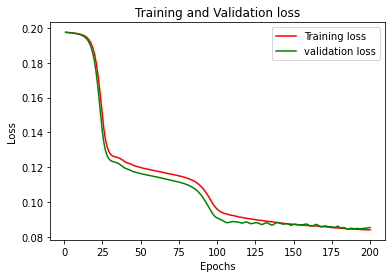

In [28]:
loss_train = classifier.history['loss']  
loss_val = classifier.history['val_loss']
epochs = range(1,Epoch+1)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'g', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


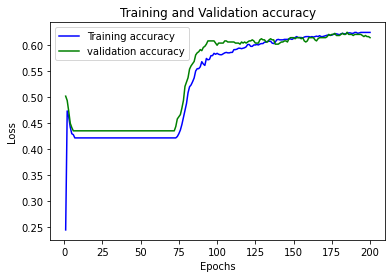

In [29]:
accuracy_train = classifier.history['accuracy']
accuracy_val = classifier.history['val_accuracy']
epochs = range(1,Epoch+1)
plt.plot(epochs, accuracy_train, 'b', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'g', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:

model = Sequential()

model.add(Dense(200, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(100, kernel_initializer='normal',activation='relu'))  
model.add(Dense(50, kernel_initializer='normal'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(25, kernel_initializer='normal'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(9, kernel_initializer='normal',activation='softmax')) 


In [31]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 200)               2400      
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 25)                1275      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 25)                0         
                                                                 
 dense_9 (Dense)             (None, 9)                

In [33]:
Epoch=200
classifier= model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=Epoch, batch_size=700)

Epoch 1/200
2/2 [==============================] - 1s 182ms/step - loss: 0.1975 - accuracy: 0.0876 - val_loss: 0.1975 - val_accuracy: 0.3417
Epoch 2/200
2/2 [==============================] - 0s 28ms/step - loss: 0.1974 - accuracy: 0.3601 - val_loss: 0.1974 - val_accuracy: 0.4417
Epoch 3/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1974 - accuracy: 0.4584 - val_loss: 0.1973 - val_accuracy: 0.5167
Epoch 4/200
2/2 [==============================] - 0s 29ms/step - loss: 0.1973 - accuracy: 0.5103 - val_loss: 0.1972 - val_accuracy: 0.5292
Epoch 5/200
2/2 [==============================] - 0s 29ms/step - loss: 0.1972 - accuracy: 0.5165 - val_loss: 0.1970 - val_accuracy: 0.5208
Epoch 6/200
2/2 [==============================] - 0s 28ms/step - loss: 0.1970 - accuracy: 0.5219 - val_loss: 0.1969 - val_accuracy: 0.5125
Epoch 7/200
2/2 [==============================] - 0s 28ms/step - loss: 0.1969 - accuracy: 0.5094 - val_loss: 0.1966 - val_accuracy: 0.5104
Epoch 8/200
2/2 [==

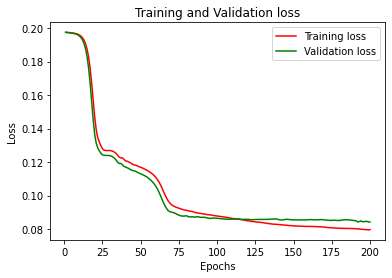

In [34]:
loss_train = classifier.history['loss'] 
loss_val = classifier.history['val_loss']
epochs = range(1,Epoch+1)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'g', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

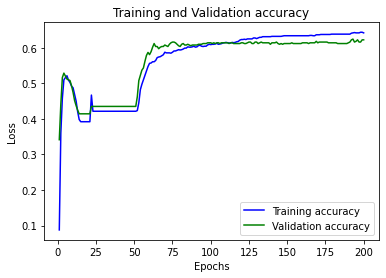

In [35]:
accuracy_train = classifier.history['accuracy']
accuracy_val = classifier.history['val_accuracy']
epochs = range(1,Epoch+1)
plt.plot(epochs, accuracy_train, 'b', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'g', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
# Both training and validation loss decreased while epochs is increasing gradually with slight difference .
# Both training and validation accuracy increased with increase in loss represents like a cumulative distribution.

In [37]:
## PART B
#1. Data Import and Exploration 
#A. Read the .h5 file and assign to a variable. 
#B. Print all the keys from the .h5 file. 
#C. Split the data into X_train, X_test, Y_train, Y_test 

In [38]:
import h5py
d= h5py.File('/content/gdrive/MyDrive/AIML/LABS/intro to NN/Autonomous_Vehicles_SVHN_single_grey1.h5')

In [39]:
d

<HDF5 file "Autonomous_Vehicles_SVHN_single_grey1.h5" (mode r)>

In [40]:
d.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [41]:
X_train = d['X_train'][:]
y_train = d['y_train'][:]
X_test =  d['X_test'][:]
y_test =  d['y_test'][:]

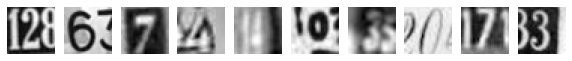

label for each image: [2 6 7 4 4 0 3 0 7 3]


In [42]:
#2. Data Visualisation and preprocessing
#B. Visualise first 10 images in train data and print its corresponding labels. [
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each image: %s' % (y_train[0:10]))

In [43]:
#A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync
X_train.shape

(42000, 32, 32)

In [44]:
y_train.shape

(42000,)

In [45]:
X_test.shape

(18000, 32, 32)

In [46]:
y_test.shape

(18000,)

In [47]:
#C. Reshape all the images with appropriate shape update the data in same variable. 
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

X_train = X_train / 255.0
X_test = X_test / 255.0


In [48]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [49]:
#F. Print total Number of classes in the Dataset.
num_classes = y_test.shape[1] 
print("The classes in this dataset :",num_classes)

The classes in this dataset : 10
